<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(0_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,52.103589,73.632622,91.514808,68.763185,-1.634542,294.379661,296.046967,-1.667306
1,0.0,1.0,36.544244,88.511270,79.994570,66.985922,-0.285471,281.750535,282.260547,-0.510012
2,0.0,2.0,97.136115,55.881259,35.835687,51.923506,3.804145,254.580712,251.083214,3.497497
3,0.0,3.0,52.978892,44.066280,49.636745,79.403796,-2.224621,233.861092,236.365695,-2.504603
4,0.0,4.0,49.998445,78.301770,27.127977,41.828343,-1.499162,205.757373,207.788869,-2.031496
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,51.337755,56.981665,41.491724,45.213921,-1.536469,203.488596,204.947704,-1.459108
249996,999.0,246.0,55.256451,65.767662,37.224950,54.241923,0.517249,223.008236,222.490190,0.518046
249997,999.0,247.0,64.453034,79.702560,99.185119,72.433356,-0.688593,325.085476,325.427166,-0.341690
249998,999.0,248.0,23.613787,51.490928,39.846490,76.849344,-1.070688,200.729861,202.183303,-1.453442


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    52.103589  73.632622  91.514808  68.763185 -1.634542  294.379661   
      1.0    36.544244  88.511270  79.994570  66.985922 -0.285471  281.750535   
      2.0    97.136115  55.881259  35.835687  51.923506  3.804145  254.580712   
      3.0    52.978892  44.066280  49.636745  79.403796 -2.224621  233.861092   
      4.0    49.998445  78.301770  27.127977  41.828343 -1.499162  205.757373   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  51.337755  56.981665  41.491724  45.213921 -1.536469  203.488596   
      246.0  55.256451  65.767662  37.224950  54.241923  0.517249  223.008236   
      247.0  64.453034  79.702560  99.185119  72.433356 -0.688593  325.085476   
      248.0  23.613787  51.490928  39.846490  76.849344 -1.070688  200.729861   
      249.0  31.254839  70.499767  39.292322  56.092702  4.072339  211.211969   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    296.046967 -1.667306  
      1.0    282.260547 -0.510012  
      2.0    251.083214  3.497497  
      3.0    236.365695 -2.504603  
      4.0    207.788869 -2.031496  
...                 ...       ...  
999.0 245.0  204.947704 -1.459108  
      246.0  222.490190  0.518046  
      247.0  325.427166 -0.341690  
      248.0  202.183303 -1.453442  
      249.0  207.320463  3.891506  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    52.103589  73.632622  91.514808  68.763185 -1.634542  294.379661   
      1.0    36.544244  88.511270  79.994570  66.985922 -0.285471  281.750535   
      2.0    97.136115  55.881259  35.835687  51.923506  3.804145  254.580712   
      3.0    52.978892  44.066280  49.636745  79.403796 -2.224621  233.861092   
      4.0    49.998445  78.301770  27.127977  41.828343 -1.499162  205.757373   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  51.337755  56.981665  41.491724  45.213921 -1.536469  203.488596   
      246.0  55.256451  65.767662  37.224950  54.241923  0.517249  223.008236   
      247.0  64.453034  79.702560  99.185119  72.433356 -0.688593  325.085476   
      248.0  23.613787  51.490928  39.846490  76.849344 -1.070688  200.729861   
      249.0  31.254839  70.499767  39.292322  56.092702  4.072339  211.211969   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    296.046967 -1.667306  
      1.0    282.260547 -0.510012  
      2.0    251.083214  3.497497  
      3.0    236.365695 -2.504603  
      4.0    207.788869 -2.031496  
...                 ...       ...  
999.0 245.0  204.947704 -1.459108  
      246.0  222.490190  0.518046  
      247.0  325.427166 -0.341690  
      248.0  202.183303 -1.453442  
      249.0  207.320463  3.891506  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,52.103589,73.632622,91.514808,68.763185,-1.634542,294.379661,296.046967,-1.667306
1,0.0,1.0,36.544244,88.511270,79.994570,66.985922,-0.285471,281.750535,282.260547,-0.510012
2,0.0,2.0,97.136115,55.881259,35.835687,51.923506,3.804145,254.580712,251.083214,3.497497
3,0.0,3.0,52.978892,44.066280,49.636745,79.403796,-2.224621,233.861092,236.365695,-2.504603
4,0.0,4.0,49.998445,78.301770,27.127977,41.828343,-1.499162,205.757373,207.788869,-2.031496
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,51.337755,56.981665,41.491724,45.213921,-1.536469,203.488596,204.947704,-1.459108
249996,999.0,246.0,55.256451,65.767662,37.224950,54.241923,0.517249,223.008236,222.490190,0.518046
249997,999.0,247.0,64.453034,79.702560,99.185119,72.433356,-0.688593,325.085476,325.427166,-0.341690
249998,999.0,248.0,23.613787,51.490928,39.846490,76.849344,-1.070688,200.729861,202.183303,-1.453442


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    52.103589  73.632622  91.514808  68.763185 -1.634542  294.379661   
      1.0    36.544244  88.511270  79.994570  66.985922 -0.285471  281.750535   
      2.0    97.136115  55.881259  35.835687  51.923506  3.804145  254.580712   
      3.0    52.978892  44.066280  49.636745  79.403796 -2.224621  233.861092   
      4.0    49.998445  78.301770  27.127977  41.828343 -1.499162  205.757373   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  51.337755  56.981665  41.491724  45.213921 -1.536469  203.488596   
      246.0  55.256451  65.767662  37.224950  54.241923  0.517249  223.008236   
      247.0  64.453034  79.702560  99.185119  72.433356 -0.688593  325.085476   
      248.0  23.613787  51.490928  39.846490  76.849344 -1.070688  200.729861   
      249.0  31.254839  70.499767  39.292322  56.092702  4.072339  211.211969   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    296.046967 -1.667306  
      1.0    282.260547 -0.510012  
      2.0    251.083214  3.497497  
      3.0    236.365695 -2.504603  
      4.0    207.788869 -2.031496  
...                 ...       ...  
999.0 245.0  204.947704 -1.459108  
      246.0  222.490190  0.518046  
      247.0  325.427166 -0.341690  
      248.0  202.183303 -1.453442  
      249.0  207.320463  3.891506  

[250000 rows x 8 columns]

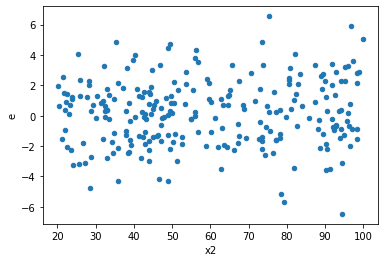

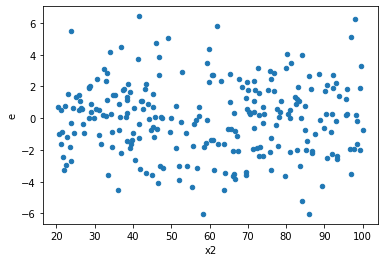

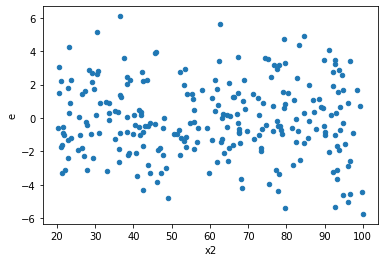

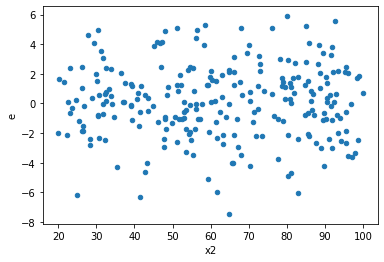

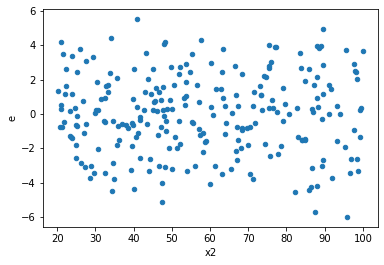

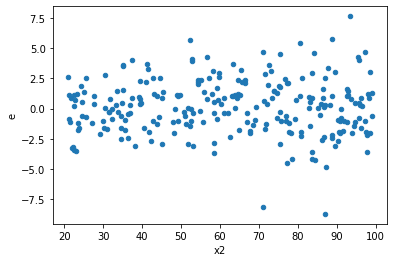

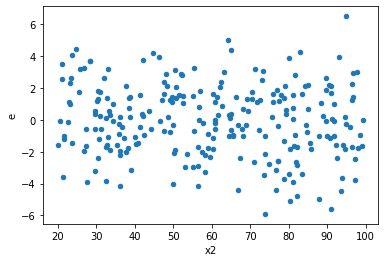

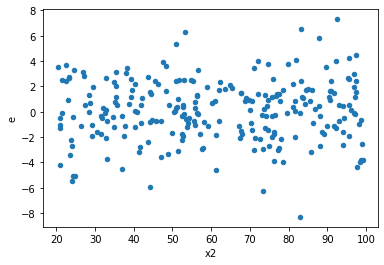

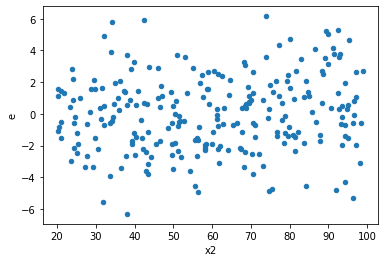

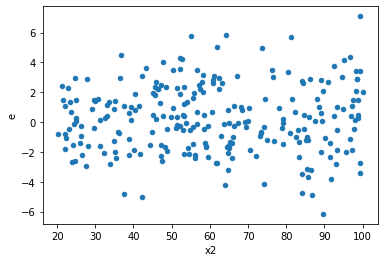

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,113.0,129.0,483.4720663781397,661.4525913439976,4.278513861753448,5.127539467782927,1.1984393725164946,0.3189089565645302,0.8405455217177349,0.1594544782822651,Reject001=1 : Homoscedasticity
1.0,117.0,125.0,594.809766475182,663.7386587921366,5.083844157907538,5.3099092703370925,1.0444673568677214,0.8097729252747907,0.5951135373626046,0.40488646263739536,Reject001=1 : Homoscedasticity
2.0,109.0,133.0,478.84682663128166,744.0109597650728,4.393090152580566,5.5940673666546825,1.273378686155267,0.18363627101220104,0.9081818644938995,0.09181813550610052,Reject001=1 : Homoscedasticity
4.0,130.0,112.0,569.9891082442726,712.2550489560557,4.38453160187902,6.359420079964783,1.4504217684825014,0.043822745136061325,0.9780886274319693,0.021911372568030663,Reject001=1 : Homoscedasticity
6.0,118.0,124.0,492.2784533898126,719.7428122242425,4.1718512999136665,5.804377517937439,1.3913193689472,0.06999267608922466,0.9650036619553877,0.03499633804461233,Reject001=1 : Homoscedasticity
9.0,132.0,110.0,582.2137626538314,651.7995566347153,4.410710323135087,5.925450514861048,1.3434231860072143,0.11002385644058976,0.9449880717797051,0.05501192822029488,Reject001=1 : Homoscedasticity
10.0,113.0,129.0,468.09533885044215,595.670397405171,4.142436626995063,4.617599979885046,1.1147062455448276,0.5489743631610244,0.7255128184194878,0.2744871815805122,Reject001=1 : Homoscedasticity
12.0,132.0,110.0,627.3218261341937,594.0643738859527,4.752438076774195,5.400585217145024,1.1363820274773093,0.4891336857508737,0.7554331571245632,0.24456684287543684,Reject001=1 : Homoscedasticity
15.0,113.0,129.0,499.52351424111714,680.9303546303973,4.42056207293024,5.278529880855793,1.1940856827188122,0.32870188610279794,0.835649056948601,0.16435094305139897,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,113.0,129.0,483.4720663781397,661.4525913439976,4.278513861753448,5.127539467782927,1.1984393725164946,0.3189089565645302,Reject001=1 : Homoscedasticity
1.0,117.0,125.0,594.809766475182,663.7386587921366,5.083844157907538,5.3099092703370925,1.0444673568677214,0.8097729252747907,Reject001=1 : Homoscedasticity
2.0,109.0,133.0,478.84682663128166,744.0109597650728,4.393090152580566,5.5940673666546825,1.273378686155267,0.18363627101220104,Reject001=1 : Homoscedasticity
3.0,129.0,113.0,831.0735014593537,633.9029444030377,6.442430243870959,5.609760569938387,0.870752240627714,0.44556644180599003,Reject001=1 : Homoscedasticity
4.0,130.0,112.0,569.9891082442726,712.2550489560557,4.38453160187902,6.359420079964783,1.4504217684825014,0.043822745136061325,Reject001=1 : Homoscedasticity
5.0,120.0,122.0,642.1794874348672,608.4513533996277,5.351495728623893,4.9873061754067844,0.9319462124824012,0.6993124739541374,Reject001=1 : Homoscedasticity
6.0,118.0,124.0,492.2784533898126,719.7428122242425,4.1718512999136665,5.804377517937439,1.3913193689472,0.06999267608922466,Reject001=1 : Homoscedasticity
7.0,132.0,110.0,743.4636372840178,616.2823037785436,5.63230028245468,5.6025663979867595,0.9947208275523688,0.9724996284020438,Reject001=1 : Homoscedasticity
8.0,118.0,124.0,666.3079182317734,675.0566122068544,5.6466772731506225,5.444004937152052,0.9641076820589238,0.8422470233977195,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      970
Reject001=0 : Heteroscedasticity     30
Name: Result_test, dtype: int64